<a href="https://colab.research.google.com/github/justkittenaround/Networks_and_Algorithms/blob/main/Simmulated_Annealing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Brute Forcing vs Simmulated Annealing of Fitness Functions

For the 5 fitness functions below prepare a:
> 1) a brute force solution \\
> 2) simulated annealing solution \\
> 3) an overhead image plot \\
> 4) surface plot \\


In [ ]:
from random import random
from random import uniform
from random import randrange
from math import exp
from time import time
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.colors import LightSource
from scipy.special import factorial

### Fitness Functions:

In [ ]:
def f1(p):
    x = p[0]
    y = p[1]
    z=(x**2 + y**2 - 2*x)**2 + x/4
    return z

def f2(p):
    x = p[0]
    y = p[1]
    z=(4 - 2.1*x**2 + x**4/3)*x**2 + x*y + (4*y**2 - 4)*y**2
    return z

def f3(p):
    x = p[0]
    y = p[1]
    z= x**2 + y**2 - 10*np.cos(2*np.pi*x) - 10*np.cos(2*np.pi*y) + 20
    return z

def f4(p):
    x = p[0]
    y = p[1]
    z=0.5  + (np.sin(np.cos(np.abs(x**2 - y**2)))**2 - 0.5) / (1+0.001*(x**2 + y**2))**2
    return z

def f5(p):
    x = p[0]
    y = p[1]
    z=(1  + (x + y + 1)**2*(19 - 14*x +  3*x**2 - 14*y +  6*x*y +  3*y**2))*(30 + (2*x - 3*y)**2*(18 - 32*x + 12*x**2 + 48*y - 36*x*y + 27*y**2))
    return z

In [ ]:
functions = [f1, f2, f3, f4, f5]

 ### Overhead Plot

In [ ]:
def overhead(cost):
    pos = plt.imshow(cost, cmap='jet', interpolation='none')
    plt.colorbar(pos)

### Surface Plot

In [ ]:
def surf(x, y, cost):
    fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
    fig.set_size_inches(10, 10)
    ls = LightSource(270, 45)
    rgb = ls.shade(cost, cmap=cm.gist_earth, vert_exag=0.1, blend_mode='soft')
    surf = ax.plot_surface(x, y, cost, rstride=1, cstride=1, facecolors=rgb,
                   linewidth=0, antialiased=False, shade=False)
    plt.show() 

### Brute Force

In [ ]:
def brute(x,y, f):
    cost = np.zeros((len(x),len(y)))
    for i in range(x.shape[0]):
        for j in range(y.shape[0]):
            cost[i,j] = f([ x[i],y[j] ])
    return cost

### Simulated Annealing

In [ ]:
def SA(f, x):
    cool_rate = 0.01 #cooling rate 
    start_temp = 100
    temp  = start_temp #temperature
    noise = np.random.normal(0,1,(x.shape))
    
    for i in range(1000): #iteration times
        for j in range(100): #how much to loop before cooling
            xi = x + noise #take position at random change to get new postion 
            delta = f(x) - f(xi) #difference between where you were and where you're going, new space better results in negative number
            
            if(delta.any() <= 0.0 or (np.exp(-delta * temp).any() > random())):  
                x = xi
        
        temp = temp - cool_rate

    return x

### Initializing the points (x,y coords):

In [ ]:
def init_points():
    x = np.linspace(-10, 10, 100)
    y = np.linspace(-10, 10, 100)
    return x,y

def mesh(x,y):
    x, y = np.meshgrid(x,y)
    return x,y

### Evaluating the Functions:

Evaluating: <function f1 at 0x7ff123ef80d0>


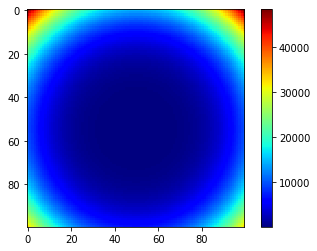

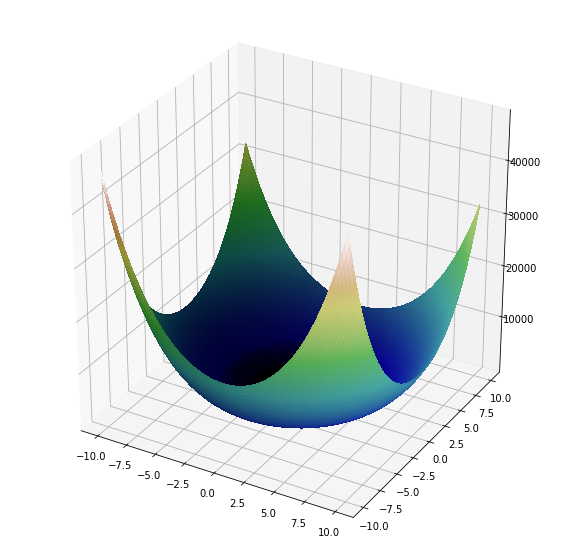

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in exp
  if sys.path[0] == '':


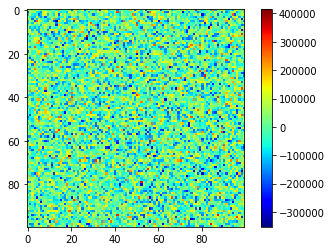

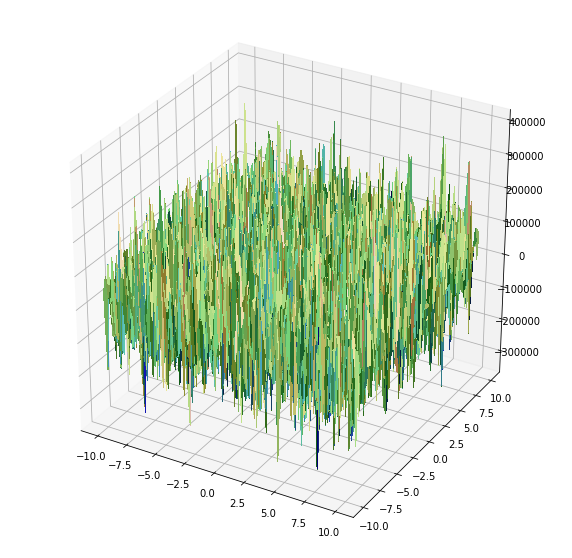

Evaluating: <function f2 at 0x7ff12a843598>


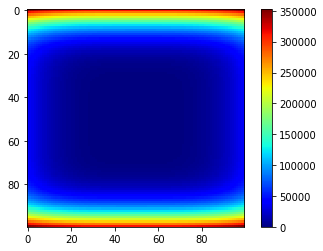

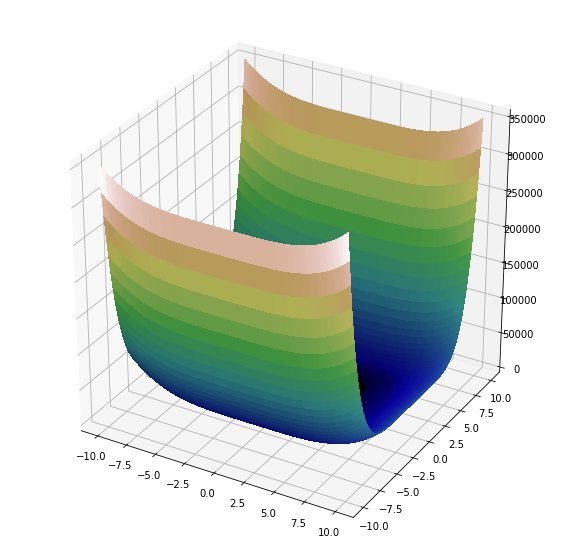

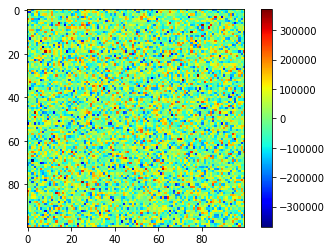

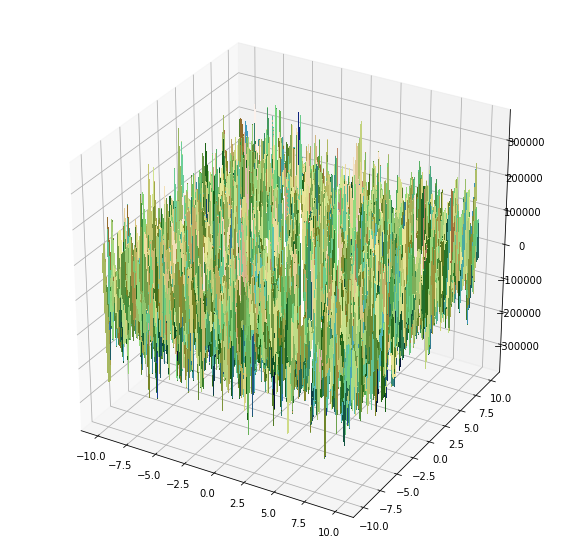

Evaluating: <function f3 at 0x7ff113f80d90>


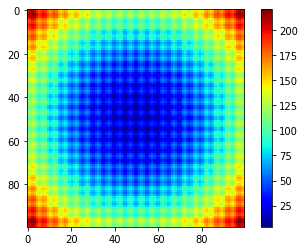

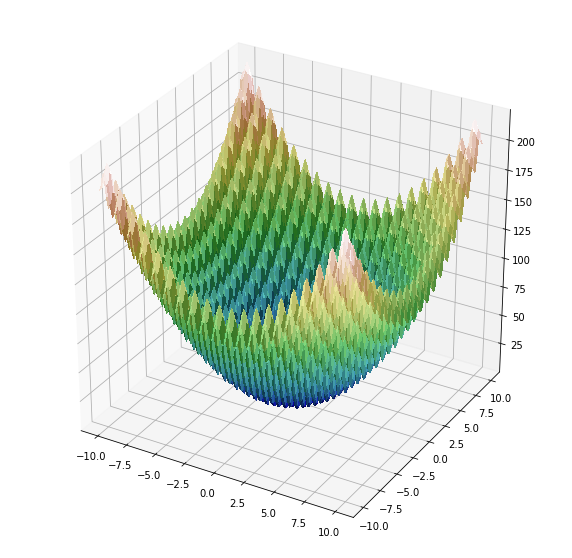

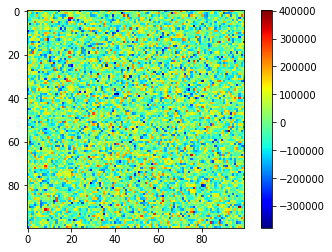

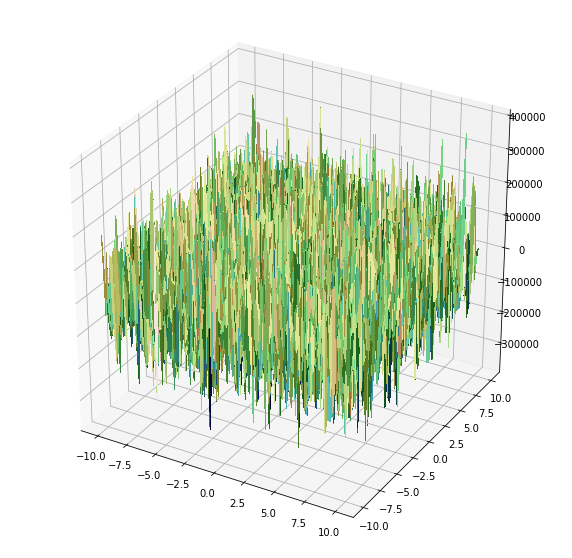

Evaluating: <function f4 at 0x7ff113f80d08>


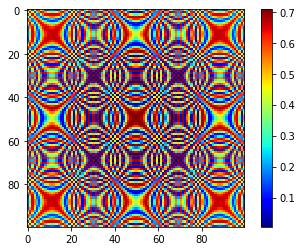

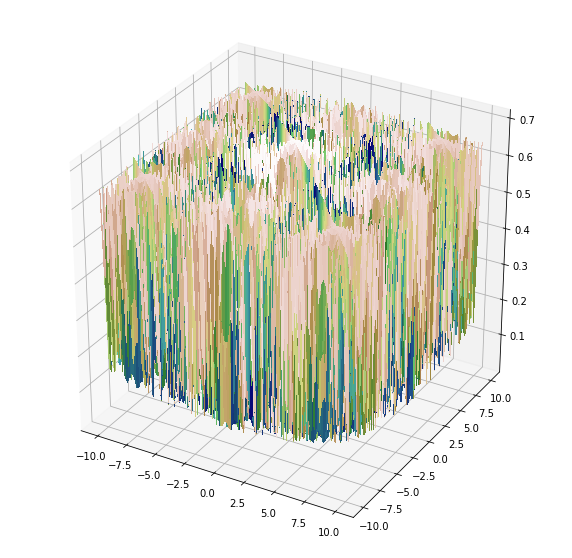

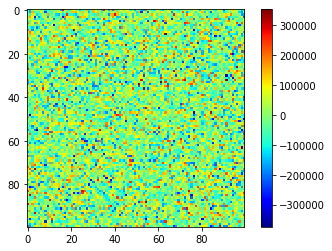

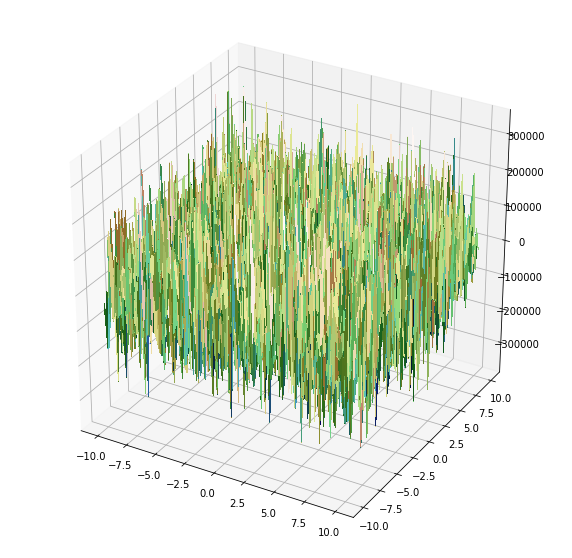

Evaluating: <function f5 at 0x7ff113f80c80>


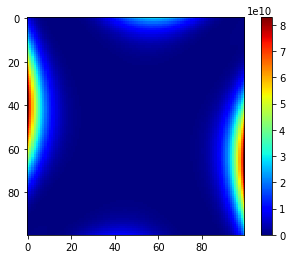

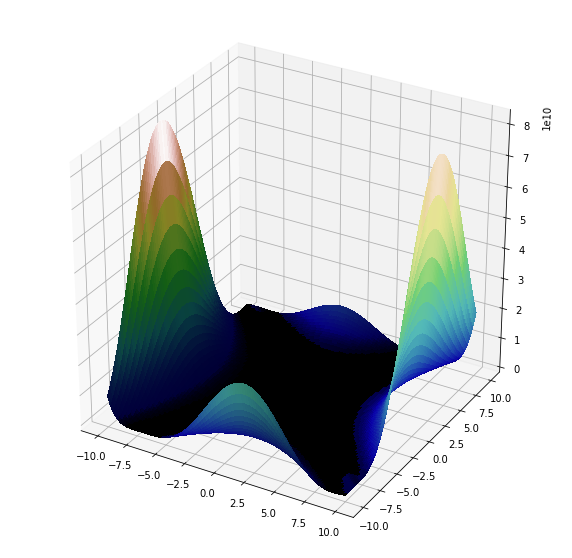

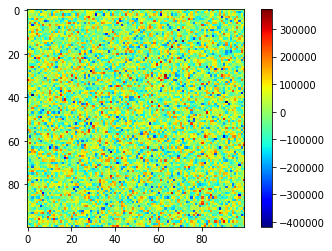

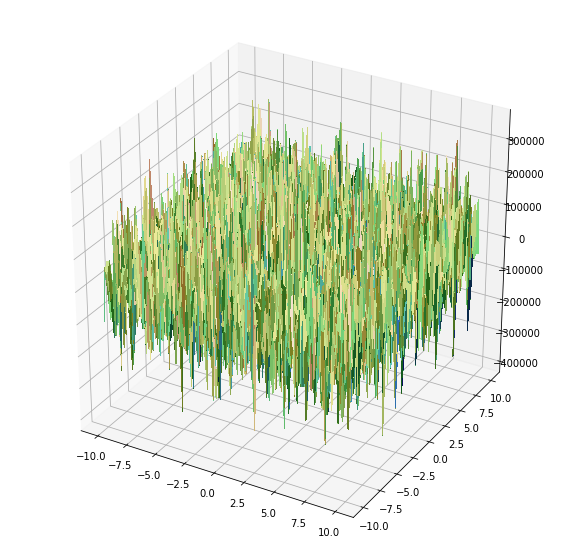

In [ ]:
for idx, f in enumerate(functions):
    print('Evaluating:', functions[idx])
    x,y = init_points()
    brute_cost = brute(x, y, f)
    x,y = mesh(x,y)
    overhead(brute_cost)
    surf(x, y, brute_cost)
    SA_cost = SA(f, x)
    overhead(SA_cost)
    surf(x, y, SA_cost)
